In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow_addons as tfa
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D


print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.4.1


In [13]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import keras
from PIL import Image
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.optimizers import RMSprop
from keras.preprocessing import image
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
get_ipython().run_line_magic('matplotlib', 'inline')
from skimage.io import imread
from sklearn.model_selection import train_test_split
import os
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from random import randint
import glob
from image_enhancement import image_enhancement
from contrast_image import contrast_image

<ipython-input-14-07c3f398a369>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(1,10,i+1)


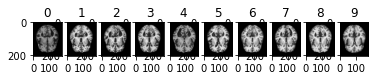

In [14]:
# TEST FOLDER
folders = glob.glob('E:\\Project\\Alzheimer_s Dataset\\test\\MildDemented*')
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        imagenames_list.append(f)

read_images_mild = []        
for image in imagenames_list:
    read_images_mild.append(cv2.imread(image))
for i in range(2):
    ax=plt.subplot(1,10,i+1)
    ax.title.set_text(i)
    plt.imshow(read_images_mild[i])    
    
# TRAIN FOLDER 
folders = glob.glob('E:\\Project\\Alzheimer_s Dataset\\train\\MildDemented*')
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        imagenames_list.append(f)

read_images_mildt = []        
for image in imagenames_list:
    read_images_mildt.append(cv2.imread(image))
for i in range(10):
    ax=plt.subplot(1,10,i+1)
    ax.title.set_text(i)
    plt.imshow(read_images_mildt[i])  

<ipython-input-15-8e0c14a139c5>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(1,10,i+1)


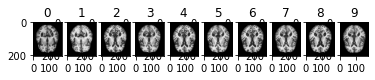

In [15]:
folders = glob.glob('E:\\Project\\Alzheimer_s Dataset\\test\\ModerateDemented*')
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        imagenames_list.append(f)

read_images_moderate = []        
for image in imagenames_list:
    read_images_moderate.append(cv2.imread(image))
for i in range(10):
    ax=plt.subplot(1,10,i+1)
    ax.title.set_text(i)
    plt.imshow(read_images_moderate[i])

# Train folder 

folders = glob.glob('E:\\Project\\Alzheimer_s Dataset\\train\\ModerateDemented*')
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        imagenames_list.append(f)

read_images_moderatet = []        
for image in imagenames_list:
    read_images_moderatet.append(cv2.imread(image))
for i in range(10):
    ax=plt.subplot(1,10,i+1)
    ax.title.set_text(i)
    plt.imshow(read_images_moderatet[i])

<ipython-input-16-be811cfccbf0>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(1,10,i+1)


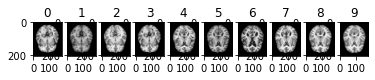

In [16]:
folders = glob.glob('E:\\Project\\Alzheimer_s Dataset\\test\\NonDemented*')
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        imagenames_list.append(f)

read_images_non = []        
for image in imagenames_list:
    read_images_non.append(cv2.imread(image))
for i in range(10):
    ax=plt.subplot(1,10,i+1)
    ax.title.set_text(i)
    plt.imshow(read_images_non[i])

# Train Folder 
folders = glob.glob('E:\\Project\\Alzheimer_s Dataset\\train\\NonDemented*')
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        imagenames_list.append(f)

read_images_nont = []        
for image in imagenames_list:
    read_images_nont.append(cv2.imread(image))
for i in range(10):
    ax=plt.subplot(1,10,i+1)
    ax.title.set_text(i)
    plt.imshow(read_images_nont[i])


<ipython-input-17-be7cbd64f450>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(1,10,i+1)


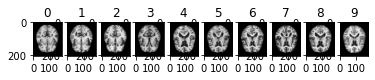

In [17]:
folders = glob.glob('E:\\Project\\Alzheimer_s Dataset\\test\\VeryMildDemented*')
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        imagenames_list.append(f)

read_images_verymild = []        
for image in imagenames_list:
    read_images_verymild.append(cv2.imread(image))
for i in range(10):
    ax=plt.subplot(1,10,i+1)
    ax.title.set_text(i)
    plt.imshow(read_images_verymild[i])
    
# TRAin Folder

folders = glob.glob('E:\\Project\\Alzheimer_s Dataset\\train\\VeryMildDemented*')
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        imagenames_list.append(f)

read_images_verymildt = []        
for image in imagenames_list:
    read_images_verymildt.append(cv2.imread(image))
for i in range(10):
    ax=plt.subplot(1,10,i+1)
    ax.title.set_text(i)
    plt.imshow(read_images_verymildt[i])

## Bilateral filter with histogram equalization in all mild demented images

In [18]:
bilateral_mild=[]
bilateral_mildt=[]
for i in range(len(read_images_mild)):
    
    bilateral_mild.append(cv2.bilateralFilter(read_images_mild[i],15,80,80))
for i in range(len(read_images_mildt)):
    bilateral_mildt.append(cv2.bilateralFilter(read_images_mildt[i],15,80,80))

In [19]:
size=(224,224)
#resize image
out = cv2.resize(bilateral_mild[1],size)

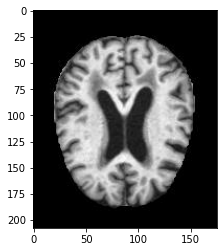

In [20]:
plt.imshow(read_images_mild[3])

In [21]:
enhancement_mild=[]
enhancement_mildt=[]
for i in range(len(bilateral_mild)):
    ie = image_enhancement.IE(bilateral_mild[i], 'HSV')
    ci = contrast_image.CI(bilateral_mild[i], 'HSV')
    output = ci.MMBEBHE()
    out = cv2.resize(output,size)
    enhancement_mild.append(out)
for i in range(len(bilateral_mildt)):
    ci = contrast_image.CI(bilateral_mildt[i], 'HSV')
    ie = image_enhancement.IE(bilateral_mildt[i], 'HSV')
    output = ci.MMBEBHE()
    out = cv2.resize(output,size)
    enhancement_mildt.append(out)

In [22]:
size=(224,224)

In [23]:
enhancement_mild_wm=[]
for i in range(len(read_images_mild)):
    image = cv2.cvtColor(read_images_mild[i], cv2.COLOR_BGR2RGB)
    pixel_values = image.reshape((-1, 3))
# convert to float
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 3
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert back to 8 bit values
    centers = np.uint8(centers)

# flatten the labels array
    labels = labels.flatten()
# disable only the cluster number 2 (turn the pixel into black)
    masked_image = np.copy(read_images_mild[i])
# convert to the shape of a vector of pixel values
    masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
    cluster = 1
    masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
    masked_image = masked_image.reshape(image.shape)
    #masked_image = cv2.resize(masked_image,size)
# show the image
    if masked_image.sum()>2800000:
        masked_image = cv2.resize(masked_image,size)
        enhancement_mild_wm.append(masked_image)
    else:
        img = masked_image-read_images_mild[i]
        img = cv2.resize(img,size)
        enhancement_mild_wm.append(img)

In [54]:
enhancement_mildt_wm=[]
read_images_mild  = read_images_mildt
for i in range(len(read_images_mild)):
    image = cv2.cvtColor(read_images_mild[i], cv2.COLOR_BGR2RGB)
    pixel_values = image.reshape((-1, 3))
# convert to float
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 3
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert back to 8 bit values
    centers = np.uint8(centers)

# flatten the labels array
    labels = labels.flatten()
# disable only the cluster number 2 (turn the pixel into black)
    masked_image = np.copy(read_images_mild[i])
# convert to the shape of a vector of pixel values
    masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
    cluster = 1
    masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
    masked_image = masked_image.reshape(image.shape)
    #masked_image = cv2.resize(masked_image,size)
# show the image
    if masked_image.sum()>2800000:
        masked_image = cv2.resize(masked_image,size)
        enhancement_mildt_wm.append(masked_image)
    else:
        img = masked_image-read_images_mild[i]
        img = cv2.resize(img,size)
        enhancement_mildt_wm.append(img)

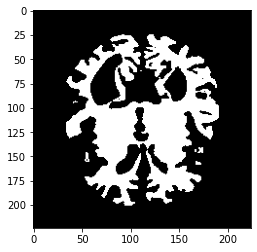

In [57]:
ret, bw_img = cv2.threshold(enhancement_mildt_wm[12],127,255,cv2.THRESH_BINARY)
plt.imshow(bw_img)

## Bilateral filter with histogram equalization in all moderate demented images

In [26]:
bilateral_moderate=[]
bilateral_moderatet=[]
for i in range(len(read_images_moderate)):
    bilateral_moderate.append(cv2.bilateralFilter(read_images_moderate[i],15,80,80))
for i in range(len(read_images_moderatet)):
    bilateral_moderatet.append(cv2.bilateralFilter(read_images_moderatet[i],15,80,80))

In [27]:
enhancement_moderate=[]
enhancement_moderatet=[]
for i in range(len(bilateral_moderate)):
    ie = image_enhancement.IE(bilateral_moderate[i], 'HSV')
    ci = contrast_image.CI(bilateral_moderate[i], 'HSV')
    output = ci.MMBEBHE()
    out = cv2.resize(output,size)
    enhancement_moderate.append(out)
for i in range(len(bilateral_moderatet)):
    ci = contrast_image.CI(bilateral_moderatet[i], 'HSV')
    ie = image_enhancement.IE(bilateral_moderatet[i], 'HSV')
    output = ci.MMBEBHE()
    out = cv2.resize(output,size)
    enhancement_moderatet.append(out)

In [28]:
enhancement_moderate_wm = []
read_images_mild = read_images_moderate
for i in range(len(read_images_mild)):
    image = cv2.cvtColor(read_images_mild[i], cv2.COLOR_BGR2RGB)
    pixel_values = image.reshape((-1, 3))
# convert to float
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 3
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert back to 8 bit values
    centers = np.uint8(centers)

# flatten the labels array
    labels = labels.flatten()
# disable only the cluster number 2 (turn the pixel into black)
    masked_image = np.copy(read_images_mild[i])
# convert to the shape of a vector of pixel values
    masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
    cluster = 1
    masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
    masked_image = masked_image.reshape(image.shape)
# show the image
    if masked_image.sum()>2800000:
        masked_image = cv2.resize(masked_image,size)
        enhancement_moderate_wm.append(masked_image)
    else:
        img = masked_image-read_images_mild[i]
        img = cv2.resize(img,size)
        enhancement_moderate_wm.append(img)

In [29]:
enhancement_moderatet_wm = []
read_images_mild = read_images_moderatet
for i in range(len(read_images_mild)):
    image = cv2.cvtColor(read_images_mild[i], cv2.COLOR_BGR2RGB)
    pixel_values = image.reshape((-1, 3))
# convert to float
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 3
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert back to 8 bit values
    centers = np.uint8(centers)

# flatten the labels array
    labels = labels.flatten()
# disable only the cluster number 2 (turn the pixel into black)
    masked_image = np.copy(read_images_mild[i])
# convert to the shape of a vector of pixel values
    masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
    cluster = 1
    masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
    masked_image = masked_image.reshape(image.shape)
# show the image
    if masked_image.sum()>2800000:
        masked_image = cv2.resize(masked_image,size)
        enhancement_moderatet_wm.append(masked_image)
    else:
        img = masked_image-read_images_mild[i]
        img = cv2.resize(img,size)
        enhancement_moderatet_wm.append(img)

## Bilateral filter with histogram equalization in all non demented images


In [30]:
bilateral_non=[]
bilateral_nont=[]
for i in range(len(read_images_non)):
    bilateral_non.append(cv2.bilateralFilter(read_images_non[i],15,80,80))
for i in range(len(read_images_nont)):
    bilateral_nont.append(cv2.bilateralFilter(read_images_nont[i],15,80,80))

In [31]:
enhancement_non=[]
enhancement_nont=[]
for i in range(len(bilateral_non)):
    ie = image_enhancement.IE(bilateral_non[i], 'HSV')
    ci = contrast_image.CI(bilateral_non[i], 'HSV')
    output = ci.MMBEBHE()
    out = cv2.resize(output,size)
    enhancement_non.append(out)
for i in range(len(bilateral_nont)):
    ci = contrast_image.CI(bilateral_nont[i], 'HSV')
    ie = image_enhancement.IE(bilateral_nont[i], 'HSV')
    output = ci.MMBEBHE()
    out = cv2.resize(output,size)
    enhancement_nont.append(out)

In [32]:
enhancement_non_wm = []
read_images_mild = read_images_non
for i in range(len(read_images_mild)):
    image = cv2.cvtColor(read_images_mild[i], cv2.COLOR_BGR2RGB)
    pixel_values = image.reshape((-1, 3))
# convert to float
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 3
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert back to 8 bit values
    centers = np.uint8(centers)

# flatten the labels array
    labels = labels.flatten()
# disable only the cluster number 2 (turn the pixel into black)
    masked_image = np.copy(read_images_mild[i])
# convert to the shape of a vector of pixel values
    masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
    cluster = 1
    masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
    masked_image = masked_image.reshape(image.shape)
# show the image
    if masked_image.sum()>2800000:
        masked_image = cv2.resize(masked_image,size)
        enhancement_non_wm.append(masked_image)
    else:
        img = masked_image-read_images_mild[i]
        img = cv2.resize(img,size)
        enhancement_non_wm.append(img)

In [33]:
enhancement_nont_wm = []
read_images_mild = read_images_nont
for i in range(len(read_images_mild)):
    image = cv2.cvtColor(read_images_mild[i], cv2.COLOR_BGR2RGB)
    pixel_values = image.reshape((-1, 3))
# convert to float
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 3
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert back to 8 bit values
    centers = np.uint8(centers)

# flatten the labels array
    labels = labels.flatten()
# disable only the cluster number 2 (turn the pixel into black)
    masked_image = np.copy(read_images_mild[i])
# convert to the shape of a vector of pixel values
    masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
    cluster = 1
    masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
    masked_image = masked_image.reshape(image.shape)
# show the image
    if masked_image.sum()>2800000:
        masked_image = cv2.resize(masked_image,size)
        enhancement_nont_wm.append(masked_image)
    else:
        img = masked_image-read_images_mild[i]
        img = cv2.resize(img,size)
        enhancement_nont_wm.append(img)
        

## Bilateral filter with histogram equalization in all very mild demented images

In [34]:
bilateral_verymild=[]
bilateral_verymildt=[]

for i in range(len(read_images_verymild)):
    bilateral_verymild.append(cv2.bilateralFilter(read_images_verymild[i],15,80,80))
for i in range(len(read_images_verymildt)):
    bilateral_verymildt.append(cv2.bilateralFilter(read_images_verymildt[i],15,80,80))

In [35]:
len(read_images_verymild)

448

In [36]:
enhancement_verymild=[]
enhancement_verymildt=[]
for i in range(len(bilateral_verymild)):
    ie = image_enhancement.IE(bilateral_verymild[i], 'HSV')
    ci = contrast_image.CI(bilateral_verymild[i], 'HSV')
    output = ci.MMBEBHE()
    out = cv2.resize(output,size)
    enhancement_verymild.append(out)
for i in range(len(bilateral_verymildt)):
    ci = contrast_image.CI(bilateral_verymildt[i], 'HSV')
    ie = image_enhancement.IE(bilateral_verymildt[i], 'HSV')
    output = ci.MMBEBHE()
    out = cv2.resize(output,size)
    enhancement_verymildt.append(out)

In [37]:
enhancement_verymild_wm = []
read_images_mild = read_images_verymild
for i in range(len(read_images_mild)):
    image = cv2.cvtColor(read_images_mild[i], cv2.COLOR_BGR2RGB)
    pixel_values = image.reshape((-1, 3))
# convert to float
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 3
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert back to 8 bit values
    centers = np.uint8(centers)

# flatten the labels array
    labels = labels.flatten()
# disable only the cluster number 2 (turn the pixel into black)
    masked_image = np.copy(read_images_mild[i])
# convert to the shape of a vector of pixel values
    masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
    cluster = 1
    masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
    masked_image = masked_image.reshape(image.shape)
# show the image
    if masked_image.sum()>2800000:
        masked_image = cv2.resize(masked_image,size)
        enhancement_verymild_wm.append(masked_image)
    else:
        img = masked_image-read_images_mild[i]
        img = cv2.resize(img,size)
        enhancement_verymild_wm.append(img)

In [38]:
enhancement_verymildt_wm = []
read_images_mild = read_images_verymildt
for i in range(len(read_images_mild)):
    image = cv2.cvtColor(read_images_mild[i], cv2.COLOR_BGR2RGB)
    pixel_values = image.reshape((-1, 3))
# convert to float
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 3
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert back to 8 bit values
    centers = np.uint8(centers)

# flatten the labels array
    labels = labels.flatten()
# disable only the cluster number 2 (turn the pixel into black)
    masked_image = np.copy(read_images_mild[i])
# convert to the shape of a vector of pixel values
    masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
    cluster = 1
    masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
    masked_image = masked_image.reshape(image.shape)
# show the image
    if masked_image.sum()>2800000:
        masked_image = cv2.resize(masked_image,size)
        enhancement_verymildt_wm.append(masked_image)
    else:
        img = masked_image-read_images_mild[i]
        img = cv2.resize(img,size)
        enhancement_verymildt_wm.append(img)

## Data Augmentation

In [39]:
print("__________TEST_______________")
print(len(enhancement_non))
print(len(enhancement_moderate))
print(len(enhancement_verymild))
print(len(enhancement_mildt))
print("__________Train_______________")
print(len(enhancement_nont))
print(len(enhancement_moderatet))
print(len(enhancement_verymildt))
print(len(enhancement_mildt))


__________TEST_______________
640
12
448
717
__________Train_______________
2560
52
1792
717


In [40]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

enhancement_moderatet1=[]
images=[]
for img in enhancement_moderatet:
    #a.append(img)
    data = img_to_array(img)
    samples = expand_dims(data, 0)
    datagen = ImageDataGenerator(rotation_range=90)
    it = datagen.flow(samples, batch_size=1)
    #images=[]
    for i in range(49):
        batch = it.next()
        image = batch[0].astype('uint8')
        images.append(image)
enhancement_moderatet1 = images
len(enhancement_moderatet1)

2548

In [41]:

enhancement_mildt1=[]
images = []
#bilateral_moderatet1 = bilateral_moderate
for img in enhancement_mildt:
    data = img_to_array(img)
    samples = expand_dims(data, 0)
    datagen = ImageDataGenerator(rotation_range=90)
    it = datagen.flow(samples, batch_size=1)
    #images=[]
    for i in range(3):
        batch = it.next()
        image = batch[0].astype('uint8')
        images.append(image)
enhancement_mildt1 = images
len(enhancement_mildt1)

2151

In [42]:
print("__________Train_______________")
print(len(enhancement_nont))
print(len(enhancement_moderatet1))
print(len(enhancement_verymildt))
print(len(enhancement_mildt1))

__________Train_______________
2560
2548
1792
2151


In [43]:
#STORING 
import os  
for i in range(len(enhancement_moderate_wm)):
    path='E:/Project/work1/test/ModerateDemented/' + str(i) + '.jpg'
    cv2.imwrite(path, enhancement_moderate_wm[i])

In [44]:
#Storing TRAIN 
for i in range(len(enhancement_moderatet_wm)):
    path='E:/Project/work1/train/ModerateDemented/' + str(i) + '.jpg'
    cv2.imwrite(path, enhancement_moderatet_wm[i])

In [45]:
 
for i in range(len(enhancement_non_wm)-1):
    path='E:/Project/work1/test/NonDemented/' + str(i) + '.jpg'
    cv2.imwrite(path, enhancement_non_wm[i])

In [46]:
#Storing TRAIN
 
for i in range(len(enhancement_nont_wm)):
    path='E:/Project/work1/train/NonDemented/' + str(i) + '.jpg'
    cv2.imwrite(path, enhancement_nont_wm[i])

In [47]:
 
for i in range(len(enhancement_verymild_wm)):
    path='E:/Project/work1/test/VeryMildDemented/' + str(i) + '.jpg'
    cv2.imwrite(path, enhancement_verymild_wm[i])

In [48]:

for i in range(len(enhancement_verymildt_wm)):
    path='E:/Project/work1/train/VeryMildDemented/' + str(i) + '.jpg'
    cv2.imwrite(path, enhancement_verymildt_wm[i])
    

In [49]:
 
for i in range(len(enhancement_mildt_wm)):
    path='E:/Project/work1/train/MildDemented/' + str(i) + '.jpg'
    cv2.imwrite(path, enhancement_mildt_wm[i])

In [50]:
 
for i in range(len(enhancement_mild_wm)):
    path='E:/Project/work1/test/MildDemented/' + str(i) + '.jpg'
    cv2.imwrite(path, enhancement_mild_wm[i])

### Data Pre-Processing

In [2]:
base_dir = "E:/Project/work1/"
root_dir = "./"
test_dir = base_dir + "test/"
train_dir = base_dir + "train/"
work_dir = root_dir + "dataset/"

if os.path.exists(work_dir):
    remove_tree(work_dir)
    

os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

Working Directory Contents: ['ModerateDemented', 'MildDemented', 'NonDemented', 'VeryMildDemented']


In [3]:
WORK_DIR = './dataset/'

CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']

IMG_SIZE = 176
IMAGE_SIZE = [176, 176]
DIM = (IMG_SIZE, IMG_SIZE)

In [4]:
#Performing Image Augmentation to have more data samples

ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

work_dr = IDG(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=6500, shuffle=False)

Found 6400 images belonging to 4 classes.


In [6]:
#Retrieving the data from the ImageDataGenerator iterator

train_data, train_labels = train_data_gen.next()

In [7]:
#Getting to know the dimensions of our dataset

print(train_data.shape, train_labels.shape)

(6400, 176, 176, 3) (6400, 4)


In [8]:
#Performing over-sampling of the data, since the classes are imbalanced

sm = SMOTE(random_state=42)

train_data, train_labels = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)

train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(train_data.shape, train_labels.shape)

(12800, 176, 176, 3) (12800, 4)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1 2 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [9]:
#Splitting the data into train, test, and validation sets

train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

### Using the InceptionV3 model as a base model for the task

In [10]:
inception_model = InceptionV3(input_shape=(176, 176, 3), include_top=False, weights="imagenet")

87916544/87910968 [==============================] - 1s 0us/step


In [11]:
for layer in inception_model.layers:
    layer.trainable=False

In [12]:
custom_inception_model = Sequential([
        inception_model,
        Dropout(0.5),
        GlobalAveragePooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(4, activation='softmax')        
    ], name = "inception_cnn_model")

In [13]:
#Defining a custom callback function to stop training our model when accuracy goes above 99%

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') > 0.99:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()

#ReduceLROnPlateau to stabilize the training process of the model
rop_callback = ReduceLROnPlateau(monitor="val_loss", patience=3)

In [14]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'),
           tfa.metrics.F1Score(num_classes=4)]

CALLBACKS = [my_callback, rop_callback]
    
custom_inception_model.compile(optimizer='rmsprop',
                              loss=tf.losses.CategoricalCrossentropy(),
                              metrics=METRICS)

custom_inception_model.summary()

Model: "inception_cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 4, 4, 2048)        21802784  
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 2048)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
batch_normalization_94 (Batc (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
batch_normalization_95 (Batc (None, 512)       

In [15]:
#Fit the training data to the model and validate it using the validation data
EPOCHS = 100

history = custom_inception_model.fit(train_data, train_labels, validation_data=(val_data, val_labels), callbacks=CALLBACKS, epochs=EPOCHS)

Epoch 1/100
256/256 [==============================] - 24s 60ms/step - loss: 1.6493 - acc: 0.3296 - auc: 0.5877 - f1_score: 0.3278 - val_loss: 0.8413 - val_acc: 0.5996 - val_auc: 0.8676 - val_f1_score: 0.5811
Epoch 2/100
256/256 [==============================] - 13s 50ms/step - loss: 1.0098 - acc: 0.5470 - auc: 0.8160 - f1_score: 0.5384 - val_loss: 0.6637 - val_acc: 0.6807 - val_auc: 0.9172 - val_f1_score: 0.6512
Epoch 3/100
256/256 [==============================] - 13s 50ms/step - loss: 0.8284 - acc: 0.6199 - auc: 0.8733 - f1_score: 0.6153 - val_loss: 0.6251 - val_acc: 0.7041 - val_auc: 0.9254 - val_f1_score: 0.6895
Epoch 4/100
256/256 [==============================] - 13s 51ms/step - loss: 0.7475 - acc: 0.6616 - auc: 0.8985 - f1_score: 0.6547 - val_loss: 0.5988 - val_acc: 0.7271 - val_auc: 0.9328 - val_f1_score: 0.7181
Epoch 5/100
256/256 [==============================] - 13s 50ms/step - loss: 0.6850 - acc: 0.7001 - auc: 0.9157 - f1_score: 0.6964 - val_loss: 0.5655 - val_acc: 0.7

### Tabulating the Results of our custom InceptionV3 model

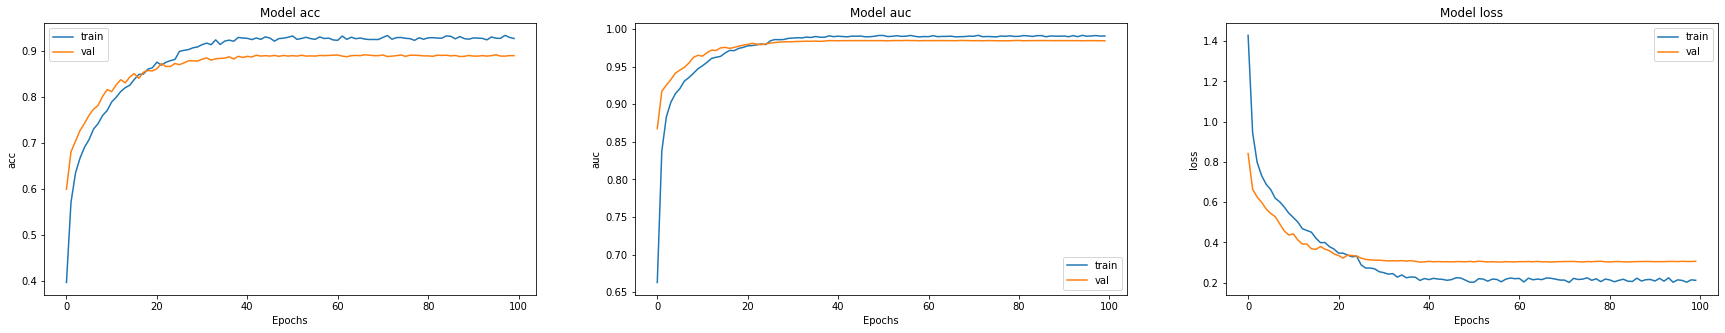

In [17]:
#Plotting the trend of the metrics during training

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [18]:
#Evaluating the model on the data

#train_scores = model.evaluate(train_data, train_labels)
#val_scores = model.evaluate(val_data, val_labels)
test_scores = custom_inception_model.evaluate(test_data, test_labels)

#print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
#print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

80/80 [==============================] - 3s 38ms/step - loss: 0.2944 - acc: 0.8906 - auc: 0.9854 - f1_score: 0.8909
Testing Accuracy: 89.06%


In [19]:
#Predicting the test data

pred_labels = custom_inception_model.predict(test_data)

In [20]:
#Print the classification report of the tested data

#Since the labels are softmax arrays, we need to roundoff to have it in the form of 0s and 1s,
#similar to the test_labels
def roundoff(arr):
    """To round off according to the argmax of each predicted label array. """
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_labels, target_names=CLASSES))

                  precision    recall  f1-score   support

     NonDemented       0.94      0.95      0.94       639
VeryMildDemented       1.00      1.00      1.00       635
    MildDemented       0.85      0.79      0.82       662
ModerateDemented       0.78      0.83      0.81       624

       micro avg       0.89      0.89      0.89      2560
       macro avg       0.89      0.89      0.89      2560
    weighted avg       0.89      0.89      0.89      2560
     samples avg       0.89      0.89      0.89      2560



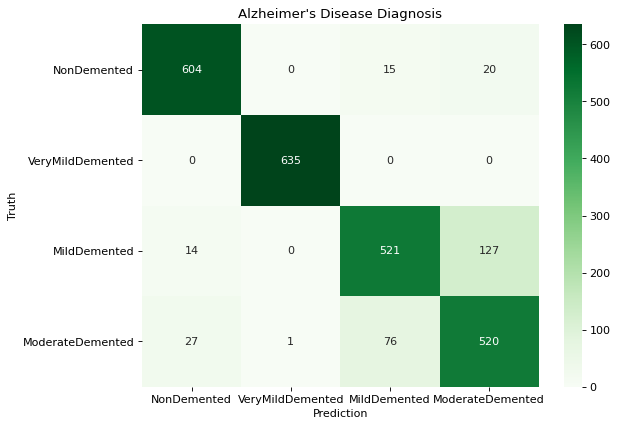

In [21]:
#Plot the confusion matrix to understand the classification in detail

pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(test_labels, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels= CLASSES,
                yticklabels=CLASSES)

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)